# 3 - Bike Sharing Prediction

## Task description:

* **Training data**: whole 2011 and first 3 quarters of 2012.
* **Test data**: 4th quarter of 2012.  Do not fit your models with these data! They should just be used to see how good/bad your model predictions are.
* **Error metric**: R2 score (scikit-learn's default for regression).
* **Features to use**: at least the ones present in the data (except for cnt). Do not use both casual and registered columns, as cnt=casual+registered (you may use one, but not both). Additionally, you can use other sources of data you deem appropriate to predict from extra features.

## Exploratory Data Analysis (descriptive analytics) (4 points)

The first step of the analysis is to get familiar with the data. After importing the datasets we perform some analysis to have a general idea about the data. 
* **.head**: to understand the columns of the datasets
* **.describe**: to understand the distribution of the data 

In [37]:
import pandas as pd
import numpy as np

In order to predict the feature cnt we need to delete casual and registered (being these variable sub classes of cnt)

In [38]:
# importing the datasets
day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")
del hour["casual"]
del hour["registered"]

In [39]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [40]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [41]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [42]:
hour['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

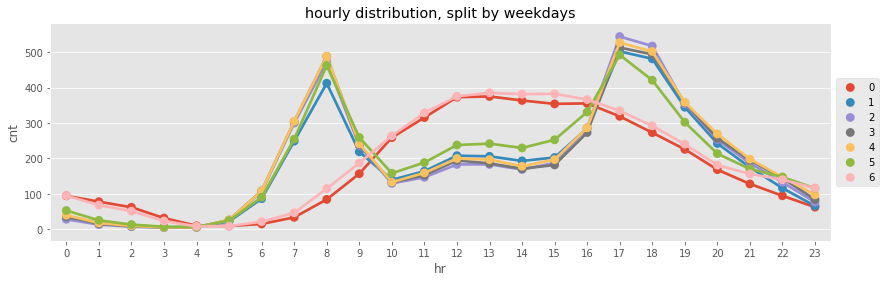

In [44]:
# here we plot the hourly distribution of the bike ride count by weekdays, to understand daily usage patterns
plt.figure(figsize=(14, 4))
weekday_hr_gb = hour.groupby(["weekday", "hr"]).mean()["cnt"].reset_index(drop=False)
sns.pointplot(x="hr", y="cnt", hue="weekday", data=weekday_hr_gb)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("hourly distribution, split by weekdays")
plt.show()

We notice the following: 
- weekdays - peaks are mornings and evenings
- weekends - peaks are during the day

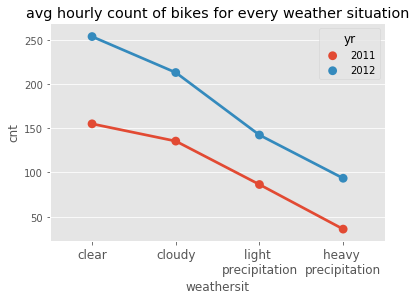

In [45]:
weathersit_gb = hour.groupby(["weathersit", "yr"]).mean()["cnt"].reset_index(drop=False)
weathersit_gb["yr"].replace([0, 1], [2011, 2012], inplace=True)
sns.pointplot(hue="yr", x="weathersit", y="cnt", data=weathersit_gb)
plt.title("avg hourly count of bikes for every weather situation")
plt.xticks(
    range(4),
    ["clear", "cloudy", "light \nprecipitation", "heavy \nprecipitation"],
    rotation=0,
    fontsize="12",
)
plt.show()

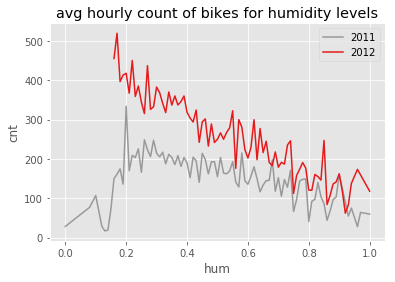

In [46]:
hum_gb = hour.groupby(["hum", "yr"]).mean()["cnt"].reset_index(drop=False)
hum_gb["yr"].replace([0, 1], [2011, 2012], inplace=True)
sns.lineplot("hum", "cnt", hue="yr", data=hum_gb, palette="Set1_r")
# sb.lineplot('hum','cnt',data=hum_gb[hum_gb['yr']==2012])
plt.title("avg hourly count of bikes for humidity levels")
plt.legend([2011, 2012])
plt.show()

We have reasons to suspect correlation. The more humid it is, the less bikes are being rented out in 2011 the trend looks a bit different - where humidity is very low also less bikes are being used together with year it has some connection to our target value


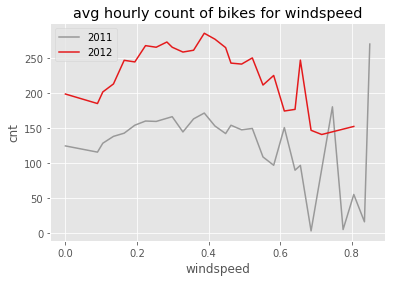

In [47]:
windspeed_gb = hour.groupby(["windspeed", "yr"]).mean()["cnt"].reset_index(drop=False)
windspeed_gb["yr"].replace([0, 1], [2011, 2012], inplace=True)
sns.lineplot("windspeed", "cnt", hue="yr", data=windspeed_gb, palette="Set1_r")
plt.title("avg hourly count of bikes for windspeed")
plt.legend([2011, 2012])
plt.show()

As expected, there is no significant trend here to be seen

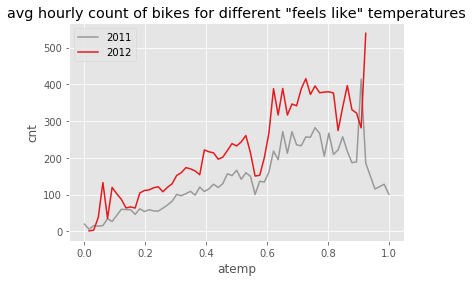

In [48]:
atemp_gb = hour.groupby(["atemp", "yr"]).mean()["cnt"].reset_index(drop=False)
atemp_gb["yr"].replace([0, 1], [2011, 2012], inplace=True)
sns.lineplot(hue="yr", x="atemp", y="cnt", data=atemp_gb, palette="Set1_r")
plt.title('avg hourly count of bikes for different "feels like" temperatures')
plt.legend([2011, 2012])
plt.show()

We see that the warmer it feels, the more bikes are being used but only up to a certain temperature. When it starts feeling very warm, less bikes are being rented out

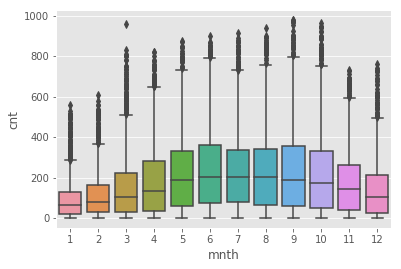

In [49]:
# here we will plot the count of rides per month, while also representing its distribution
ax = sns.boxplot(x="mnth", y="cnt", data=hour)

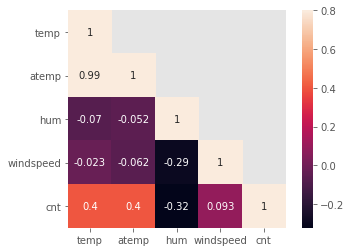

In [50]:
# Here we plot the correlations among variables through a heatmap, which will be useful during the feature engineering phase.
corrMatt = hour[["temp", "atemp", "hum", "windspeed", "cnt"]].corr()

mask = np.array(corrMatt)
# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
sns.heatmap(corrMatt, mask=mask, vmax=0.8, square=True, annot=True, ax=ax)

plt.show()

## Data Cleaning
Here we star with cleaning the data. 
* **Step 1:** We split the variables into categorical and numerical to understand what variable can undergo what transformation
* **Step 2:** We check for NAs
* **Step 3:** We plot the different variables as boxplots to get a sense of the outlier distribution. 

### Features class 

In order to improve the quality of the predictions, it is possible to transform wrongly encoded numerical feature in categorical ones. In this case "hr", "weekday", "mnth", "season", "weathersit", "holiday", "workingday" are encoded as numerical feature but they are clearly categorical. 

In [51]:
#here we split the variables into categorical and numerical under two different lists
from numpy import math
import numpy as np

catfeats = pd.DataFrame(hour.describe(include=["O"])).columns
numfeats = list(hour.select_dtypes(include=[np.number]).columns.values)

In [52]:
print(catfeats)

Index(['dteday'], dtype='object')


In [53]:
print(numfeats)

['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [54]:
#here we coerce the variable type to categorical for these features
categoryVariableList = [
    "hr",
    "weekday",
    "mnth",
    "season",
    "weathersit",
    "holiday",
    "workingday",
]
for var in categoryVariableList:
    hour[var] = hour[var].astype("category")

In [55]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null category
yr            17379 non-null int64
mnth          17379 non-null category
hr            17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
workingday    17379 non-null category
weathersit    17379 non-null category
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: category(7), float64(4), int64(3), object(1)
memory usage: 1.2+ MB


### NAs

As it is possible to notice there are not NAs in the dataset. Therefore, no further action is required. 

In [56]:
#here we go hunting for NAs
for column in hour:
    NAs = hour[column].isnull().sum()
    print(column + " " + str(NAs))

instant 0
dteday 0
season 0
yr 0
mnth 0
hr 0
holiday 0
weekday 0
workingday 0
weathersit 0
temp 0
atemp 0
hum 0
windspeed 0
cnt 0


### Outliers 
Here we have a look on the outliers. We will however not exclude any, as after iterating, we understood that we get better results withouth doing that. 

In [57]:
import seaborn as sn

In [58]:
def show_outlier():
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(12, 10)
    sn.boxplot(data=hour, y="cnt", orient="v", ax=axes[0][0])
    sn.boxplot(data=hour, y="cnt", x="season", orient="v", ax=axes[0][1])
    sn.boxplot(data=hour, y="cnt", x="hr", orient="v", ax=axes[1][0])
    sn.boxplot(data=hour, y="cnt", x="workingday", orient="v", ax=axes[1][1])

    axes[0][0].set(ylabel="Count", title="Box Plot On Count")
    axes[0][1].set(xlabel="Season", ylabel="Count", title="Box Plot On Count Across Season")
    axes[1][0].set(
        xlabel="Hour Of The Day",
        ylabel="Count",
        title="Box Plot On Count Across Hour Of The Day",
    )
    axes[1][1].set(
        xlabel="Working Day", ylabel="Count", title="Box Plot On Count Across Working Day"
    )

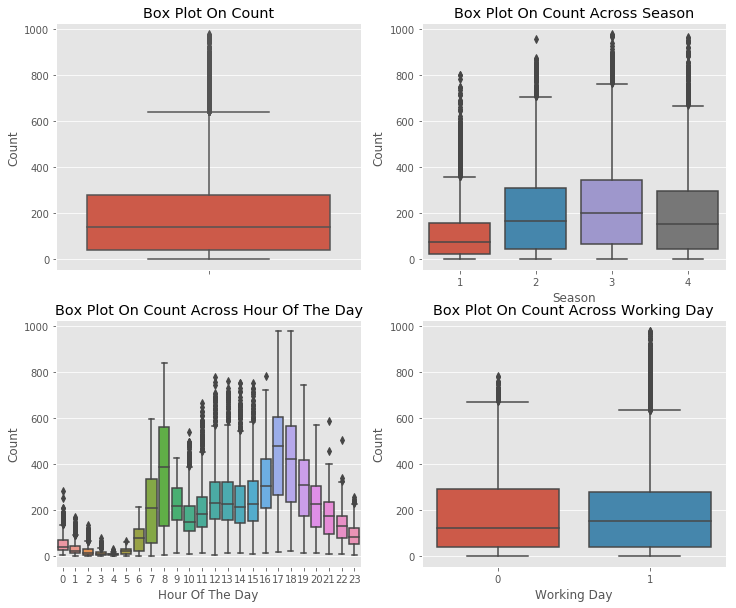

In [59]:
show_outlier()

## Feature Engineering
Here we switch the original columns, with some dummy ones, so to fit the format needs of our algorithms. 

In [60]:
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

In [61]:
hour_m = pd.DataFrame.copy(hour)
dummy_columns = ["season", "yr", "mnth", "hr", "weekday", "weathersit"]
for dummy_column in dummy_columns:
    hour_m = generate_dummies(hour_m, dummy_column)

In [62]:
# remove the original categorical variables: "season", "yr", "mnth", "hr", "weekday", "weathersit"
for dummy_column in dummy_columns:
    del hour_m[dummy_column]

In [63]:
## drop also the variables 'instant' since it is irrelevant
del hour_m['instant']

In [64]:
hour_m.head()

,dteday,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,2011-01-01,0,0,0.24,0.2879,0.81,0.0,16,1,0,...,0,0,0,0,0,1,1,0,0,0
1,2011-01-01,0,0,0.22,0.2727,0.80,0.0,40,1,0,...,0,0,0,0,0,1,1,0,0,0
2,2011-01-01,0,0,0.22,0.2727,0.80,0.0,32,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2011-01-01,0,0,0.24,0.2879,0.75,0.0,13,1,0,...,0,0,0,0,0,1,1,0,0,0
4,2011-01-01,0,0,0.24,0.2879,0.75,0.0,1,1,0,...,0,0,0,0,0,1,1,0,0,0


## Machine Learning (predictive analytics) (5 points)

In this part, we start applying the different models we want to apply. The order of this subchapter is the following:
* **Step 1: Train and test split**
* **Step 2: Regression model**
* **Step 3: Random forest**
* **Step 4: XGBoost**
* **Step 5: Combining models**
* **Step 6: Pipeline**


### Training test split

In [65]:
# here we create the training set from the complete dataset we have, using the date as filtering item
X_train = hour_m.loc[hour_m["dteday"] < "2012-10-1"]
del X_train["cnt"]
del X_train["dteday"]
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.2879,0.81,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [66]:
# here we create the test set from the complete dataset we have, using the date as filtering item
X_test = hour_m.loc[hour_m["dteday"] >= "2012-10-1"]
del X_test["cnt"]
del X_test["dteday"]
X_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
15427,0,1,0.46,0.4545,0.88,0.0896,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
15428,0,1,0.46,0.4545,0.88,0.0000,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
15429,0,1,0.46,0.4545,0.88,0.0000,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
15430,0,1,0.46,0.4545,0.88,0.0000,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
15431,0,1,0.46,0.4545,0.88,0.1045,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [67]:
y_train = hour_m.loc[hour_m["dteday"] < "2012-10-1"]["cnt"]
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [68]:
y_test = hour_m.loc[hour_m["dteday"] >= "2012-10-1"]["cnt"]
y_test.head()

15427    33
15428     8
15429     8
15430     6
15431     6
Name: cnt, dtype: int64

## Regression Model
Here we run our regression model, which is the first model we want to try as if with such a simple one we get good results, we would prefer it over more complex ones. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [69]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_rm = regr.predict(X_test)

In [70]:
# here we calculate the r^2 for the model
r2_rm = r2_score(y_test, y_pred_rm)
r2_rm.round(2)

0.63

In [71]:
accuracy_rm = cross_val_score(estimator=regr, X=X_train, y=y_train, cv=5)
accuracy_rm[1].round(2)

0.68

Lets compare the distribution of train and test results. the distribution of train and test looks very different. It confirms visually that our model has not predicted really in a proper way cnt.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


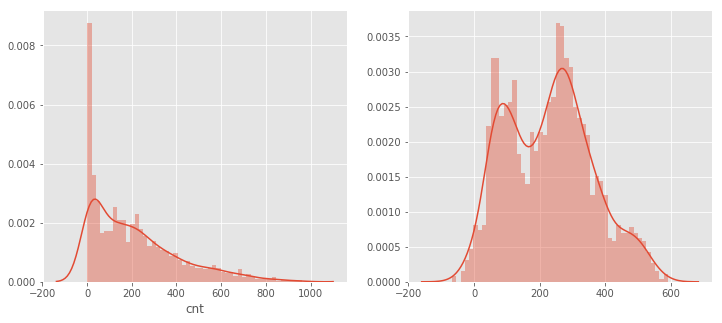

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sn.distplot(y_test, ax=ax1, bins=50)
sn.distplot((y_pred_rm), ax=ax2, bins=50)

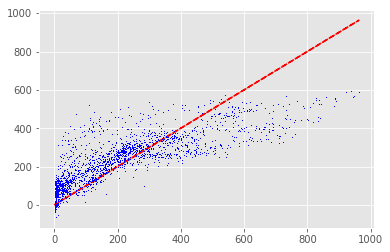

In [73]:
plt.plot(y_test, y_test, "r--", y_test, y_pred_rm, "b,")
plt.show()

### Random forest
Here we run out random forest model. Also, using grid_search, we find the best parameters for this model. 

In [ ]:
# Grid Search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [74]:
regressor = RandomForestRegressor()
parameters = [
    {"n_estimators": [150, 200, 250, 300], "max_features": ["auto", "sqrt", "log2"]}
]
grid_search = GridSearchCV(estimator=regressor, param_grid=parameters)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [75]:
best_parameters

{'max_features': 'auto', 'n_estimators': 200}

In [127]:
# Random Forest Regression model
# Use the best parameters found from above to build the model

regressor = RandomForestRegressor(n_estimators=200, max_features="auto")
regressor.fit(X_train, y_train)

# Predicting the values
y_pred_rf = regressor.predict(X_test)

In [128]:
r2_rf = r2_score(y_test, y_pred_rf)
r2_rf.round(2)

0.85

In [129]:
# Using k-fold cross validation to evaluate the performance of the model
accuracy_rf = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=5)
accuracy_rf = accuracy_rf.mean()
accuracy_rf.round(2)

0.72

Here we plot the variable importance to get a grasp of what the most important ones are, and the relative importance of each one as well.

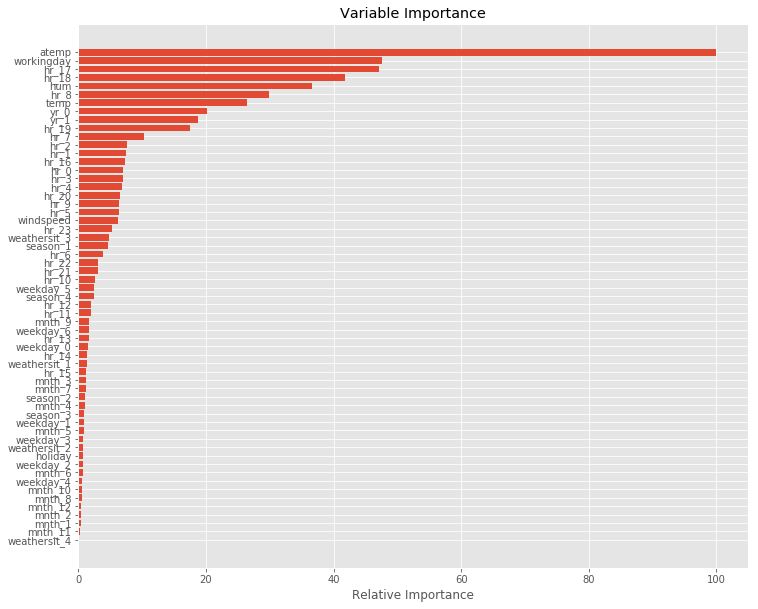

In [130]:
# Relative importance of features
feature_importance = regressor.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


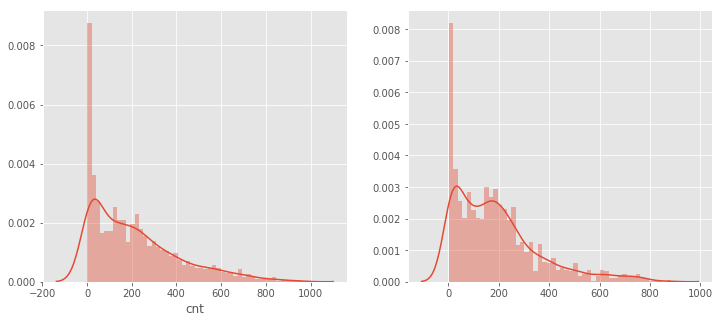

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sn.distplot(y_test, ax=ax1, bins=50)
sn.distplot((y_pred_rf), ax=ax2, bins=50)

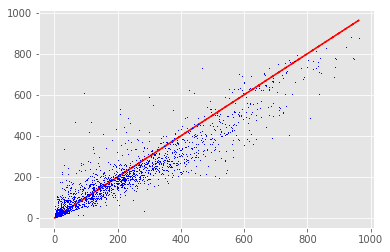

In [131]:
plt.plot(y_test, y_test, 'r--', y_test, y_pred_rf, 'b,')
plt.show()

### XGBoost
Here we run the XGBoost model. 

In [82]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [83]:
# here we coerce the variable type to 'int' to let XGBoost run
X_train["holiday"] = X_train.holiday.astype("int")
X_train["workingday"] = X_train.workingday.astype("int")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
# here we coerce the variable type to 'int' to let XGBoost run
X_test["holiday"] = X_test.holiday.astype("int")
X_test["workingday"] = X_test.workingday.astype("int")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


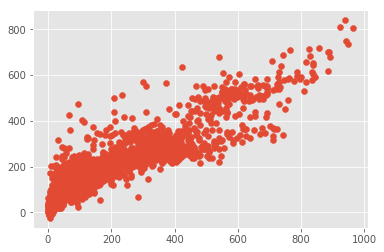

In [85]:
xgb_model = xgb.XGBRegressor(
    objective="reg:linear",
    random_state=42,
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
)
xgb_model.fit(X_train, y_train)
y_pred_xgb_standard = xgb_model.predict(X_test)
plt.scatter(y_test, y_pred_xgb_standard)
r2_xgb_standard = r2_score(y_test, y_pred_xgb_standard)

In [86]:
accuracy_xgb_model = cross_val_score(estimator=xgb_model, X=X_train, y=y_train, cv=5)
accuracy_xgb_model = accuracy_xgb_model.mean()
accuracy_xgb_model.round(2)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.77

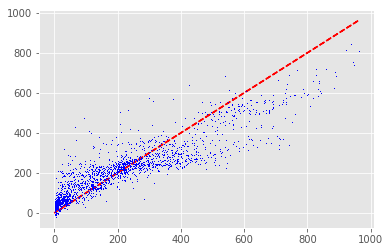

In [87]:
plt.plot(y_test, y_test, 'r--', y_test, y_pred_xgb_standard, 'b,')
plt.show()

In [88]:
# tuning Hyperparameters
parameters_xgb = [
    {
        "n_estimators": [500, 1000],
        "max_depth": [4, 8, 12],
        "colsample_bytree": [0.4, 0.8],
    }
]
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters_xgb)
grid_search = grid_search.fit(X_train, y_train)
best_parameters_xgb = grid_search.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getat

In [89]:
best_parameters_xgb

{'colsample_bytree': 0.4, 'max_depth': 4, 'n_estimators': 1000}

In [90]:
# finetuned_model
model = xgb.XGBRegressor(max_depth=4, n_estimators=1000, colsample_bytree=0.4, seed=42)

model.fit(
    X_train,
    y_train,
    eval_metric="rmse",
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True,
    early_stopping_rounds=10,
)

[0]	validation_0-rmse:242.567	validation_1-rmse:274.475
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:228.071	validation_1-rmse:255.708
[2]	validation_0-rmse:214.654	validation_1-rmse:240.594
[3]	validation_0-rmse:202.794	validation_1-rmse:233.231
[4]	validation_0-rmse:191.253	validation_1-rmse:225.791
[5]	validation_0-rmse:181.13	validation_1-rmse:219.175
[6]	validation_0-rmse:172.771	validation_1-rmse:213.123
[7]	validation_0-rmse:165.231	validation_1-rmse:206.857
[8]	validation_0-rmse:158.808	validation_1-rmse:202.27
[9]	validation_0-rmse:152.418	validation_1-rmse:196.914
[10]	validation_0-rmse:147	validation_1-rmse:192.34
[11]	validation_0-rmse:142.693	validation_1-rmse:188.243
[12]	validation_0-rmse:137.408	validation_1-rmse:182.252
[13]	validation_0-rmse:133.712	validation_1-rmse:177.983
[14]	validation_0-rmse:129.08	validation_1-rmse:172.779
[15]

[141]	validation_0-rmse:63.1046	validation_1-rmse:93.3526
[142]	validation_0-rmse:63.017	validation_1-rmse:93.3072
[143]	validation_0-rmse:62.8114	validation_1-rmse:93.2271
[144]	validation_0-rmse:62.5979	validation_1-rmse:93.0878
[145]	validation_0-rmse:62.421	validation_1-rmse:92.9272
[146]	validation_0-rmse:62.0185	validation_1-rmse:92.4819
[147]	validation_0-rmse:61.4983	validation_1-rmse:91.8378
[148]	validation_0-rmse:61.4312	validation_1-rmse:91.7239
[149]	validation_0-rmse:61.1969	validation_1-rmse:91.5623
[150]	validation_0-rmse:60.974	validation_1-rmse:91.3944
[151]	validation_0-rmse:60.8995	validation_1-rmse:91.2069
[152]	validation_0-rmse:60.8404	validation_1-rmse:91.06
[153]	validation_0-rmse:60.7698	validation_1-rmse:90.9576
[154]	validation_0-rmse:60.7094	validation_1-rmse:90.9305
[155]	validation_0-rmse:60.5392	validation_1-rmse:90.7551
[156]	validation_0-rmse:60.4997	validation_1-rmse:90.7192
[157]	validation_0-rmse:60.456	validation_1-rmse:90.6899
[158]	validation_0-r

[283]	validation_0-rmse:47.8118	validation_1-rmse:78.7569
[284]	validation_0-rmse:47.7763	validation_1-rmse:78.7506
[285]	validation_0-rmse:47.7136	validation_1-rmse:78.7138
[286]	validation_0-rmse:47.6842	validation_1-rmse:78.7061
[287]	validation_0-rmse:47.639	validation_1-rmse:78.6491
[288]	validation_0-rmse:47.6045	validation_1-rmse:78.6167
[289]	validation_0-rmse:47.5164	validation_1-rmse:78.5305
[290]	validation_0-rmse:47.4794	validation_1-rmse:78.5384
[291]	validation_0-rmse:47.4542	validation_1-rmse:78.5331
[292]	validation_0-rmse:47.4059	validation_1-rmse:78.5405
[293]	validation_0-rmse:47.3603	validation_1-rmse:78.4656
[294]	validation_0-rmse:47.3129	validation_1-rmse:78.4712
[295]	validation_0-rmse:47.1556	validation_1-rmse:78.2941
[296]	validation_0-rmse:47.1096	validation_1-rmse:78.27
[297]	validation_0-rmse:47.0703	validation_1-rmse:78.298
[298]	validation_0-rmse:47.0132	validation_1-rmse:78.2457
[299]	validation_0-rmse:46.9986	validation_1-rmse:78.2475
[300]	validation_0

[425]	validation_0-rmse:42.4892	validation_1-rmse:74.4641
[426]	validation_0-rmse:42.4665	validation_1-rmse:74.4511
[427]	validation_0-rmse:42.4376	validation_1-rmse:74.4306
[428]	validation_0-rmse:42.4192	validation_1-rmse:74.3964
[429]	validation_0-rmse:42.412	validation_1-rmse:74.3977
[430]	validation_0-rmse:42.4037	validation_1-rmse:74.3976
[431]	validation_0-rmse:42.3706	validation_1-rmse:74.3616
[432]	validation_0-rmse:42.3521	validation_1-rmse:74.361
[433]	validation_0-rmse:42.3483	validation_1-rmse:74.3628
[434]	validation_0-rmse:42.3323	validation_1-rmse:74.348
[435]	validation_0-rmse:42.212	validation_1-rmse:74.2228
[436]	validation_0-rmse:42.1857	validation_1-rmse:74.0669
[437]	validation_0-rmse:42.1675	validation_1-rmse:74.067
[438]	validation_0-rmse:42.15	validation_1-rmse:74.0625
[439]	validation_0-rmse:42.1394	validation_1-rmse:74.0716
[440]	validation_0-rmse:42.1219	validation_1-rmse:74.051
[441]	validation_0-rmse:42.0994	validation_1-rmse:74.0265
[442]	validation_0-rms

[567]	validation_0-rmse:39.696	validation_1-rmse:72.1454
[568]	validation_0-rmse:39.6847	validation_1-rmse:72.1448
[569]	validation_0-rmse:39.6771	validation_1-rmse:72.1447
[570]	validation_0-rmse:39.665	validation_1-rmse:72.1466
[571]	validation_0-rmse:39.6616	validation_1-rmse:72.1458
[572]	validation_0-rmse:39.6419	validation_1-rmse:72.1332
[573]	validation_0-rmse:39.6403	validation_1-rmse:72.1323
[574]	validation_0-rmse:39.5932	validation_1-rmse:72.0998
[575]	validation_0-rmse:39.5525	validation_1-rmse:72.072
[576]	validation_0-rmse:39.5221	validation_1-rmse:72.0356
[577]	validation_0-rmse:39.516	validation_1-rmse:72.0282
[578]	validation_0-rmse:39.4954	validation_1-rmse:72.0102
[579]	validation_0-rmse:39.4908	validation_1-rmse:72.0047
[580]	validation_0-rmse:39.4863	validation_1-rmse:72.0046
[581]	validation_0-rmse:39.4757	validation_1-rmse:72.0051
[582]	validation_0-rmse:39.449	validation_1-rmse:71.9833
[583]	validation_0-rmse:39.4346	validation_1-rmse:71.9836
[584]	validation_0-

[709]	validation_0-rmse:37.6861	validation_1-rmse:70.4466
[710]	validation_0-rmse:37.6668	validation_1-rmse:70.4365
[711]	validation_0-rmse:37.661	validation_1-rmse:70.4234
[712]	validation_0-rmse:37.625	validation_1-rmse:70.3838
[713]	validation_0-rmse:37.6214	validation_1-rmse:70.3842
[714]	validation_0-rmse:37.6125	validation_1-rmse:70.3718
[715]	validation_0-rmse:37.6058	validation_1-rmse:70.3706
[716]	validation_0-rmse:37.5986	validation_1-rmse:70.3797
[717]	validation_0-rmse:37.5894	validation_1-rmse:70.3761
[718]	validation_0-rmse:37.5576	validation_1-rmse:70.3109
[719]	validation_0-rmse:37.5484	validation_1-rmse:70.3116
[720]	validation_0-rmse:37.546	validation_1-rmse:70.3117
[721]	validation_0-rmse:37.5193	validation_1-rmse:70.2697
[722]	validation_0-rmse:37.4848	validation_1-rmse:70.2439
[723]	validation_0-rmse:37.4634	validation_1-rmse:70.2074
[724]	validation_0-rmse:37.445	validation_1-rmse:70.1918
[725]	validation_0-rmse:37.4359	validation_1-rmse:70.1852
[726]	validation_0

[851]	validation_0-rmse:36.0267	validation_1-rmse:69.1714
[852]	validation_0-rmse:36.0244	validation_1-rmse:69.171
[853]	validation_0-rmse:36.017	validation_1-rmse:69.1387
[854]	validation_0-rmse:36.0108	validation_1-rmse:69.1336
[855]	validation_0-rmse:35.9964	validation_1-rmse:69.136
[856]	validation_0-rmse:35.9906	validation_1-rmse:69.1315
[857]	validation_0-rmse:35.9871	validation_1-rmse:69.1292
[858]	validation_0-rmse:35.9847	validation_1-rmse:69.1348
[859]	validation_0-rmse:35.9707	validation_1-rmse:69.1319
[860]	validation_0-rmse:35.9629	validation_1-rmse:69.1303
[861]	validation_0-rmse:35.9619	validation_1-rmse:69.1295
[862]	validation_0-rmse:35.9576	validation_1-rmse:69.1268
[863]	validation_0-rmse:35.9489	validation_1-rmse:69.132
[864]	validation_0-rmse:35.9325	validation_1-rmse:69.1274
[865]	validation_0-rmse:35.9168	validation_1-rmse:69.1276
[866]	validation_0-rmse:35.9115	validation_1-rmse:69.131
[867]	validation_0-rmse:35.8992	validation_1-rmse:69.1276
[868]	validation_0-

[993]	validation_0-rmse:34.6465	validation_1-rmse:68.2795
[994]	validation_0-rmse:34.6349	validation_1-rmse:68.2452
[995]	validation_0-rmse:34.6231	validation_1-rmse:68.2429
[996]	validation_0-rmse:34.6134	validation_1-rmse:68.2335
[997]	validation_0-rmse:34.6033	validation_1-rmse:68.2394
[998]	validation_0-rmse:34.5984	validation_1-rmse:68.2367
[999]	validation_0-rmse:34.5891	validation_1-rmse:68.2428


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=True, subsample=1)

In [91]:
# here we do the actual prediction using
y_pred_xgb = model.predict(X_test)

In [92]:
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_xgb.round(2)

0.88

In [93]:
accuracy_xgb = cross_val_score(estimator=xgb_model, X=X_train, y=y_train, cv=5)
accuracy_xgb = accuracy_xgb.mean()
accuracy_xgb.round(2)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.77

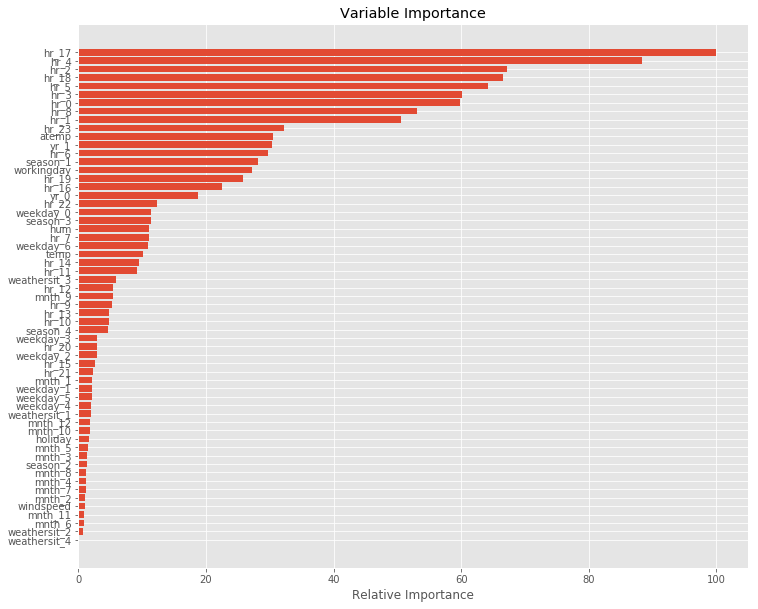

In [94]:
# Relative importance of features
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


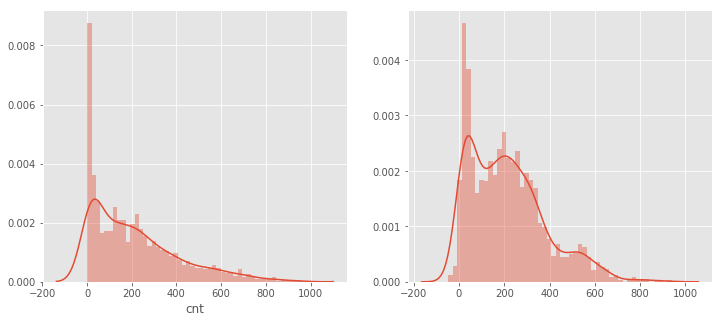

In [95]:
# here we plot to estimate the goodness of our prediction
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sn.distplot(y_test, ax=ax1, bins=50)
sn.distplot((y_pred_xgb), ax=ax2, bins=50)

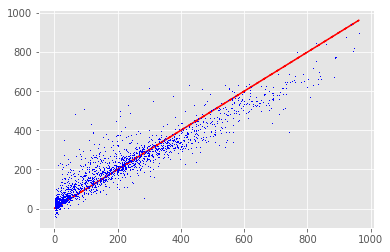

In [96]:
plt.plot(y_test, y_test, 'r--', y_test, y_pred_xgb, 'b,')
plt.show()

## Combining Models
In this section we combine some models, to see if we manage to achieve better results than the ones of the model which alone achieves the best results. We use random forest, gradient boosting and extra trees. 

In [97]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.metrics import r2_score

In order to make this happen given limited computational power, we resized the dataset. This code therefore serves to  improve the running time and testing the code quality rather than given actual predictions.

In [98]:
X_train_sample = hour_m[0:688]  # one month as training data
del X_train_sample["cnt"]
del X_train_sample["dteday"]

X_test_sample = hour_m.loc[688:829]  # one week to be predicted
del X_test_sample["cnt"]
del X_test_sample["dteday"]

y_train_sample = hour_m[0:688]["cnt"]

y_test_sample = hour_m[688:830]["cnt"]

In [138]:
# here we define the models
rf = ensemble.RandomForestClassifier()
gbm = ensemble.GradientBoostingClassifier()
et = ensemble.ExtraTreesClassifier()

combo = ensemble.VotingClassifier(
    estimators=[("rf", rf), ("gbm", gbm), ("et", et)],
    voting="soft",
    weights=[3, 5, 2],
    n_jobs=10,
)

combo.fit(X_train_sample, y_train_sample)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...s='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=10, voting='soft',
         weights=[3, 5, 2])

In [139]:
#here we do the prediction
y_pred_combo = combo.predict(X_test_sample)

In [140]:
# here we measure the r^2
r2_combo = r2_score(y_test_sample, y_pred_combo)
r2_combo.round(2)

-0.76

In [102]:
# here we measure the accuracy
accuracy_combo = cross_val_score(
    estimator=combo, X=X_train_sample, y=y_train_sample, cv=5
)
accuracy_combo = accuracy_combo.mean()
accuracy_combo.round(2)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.05

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


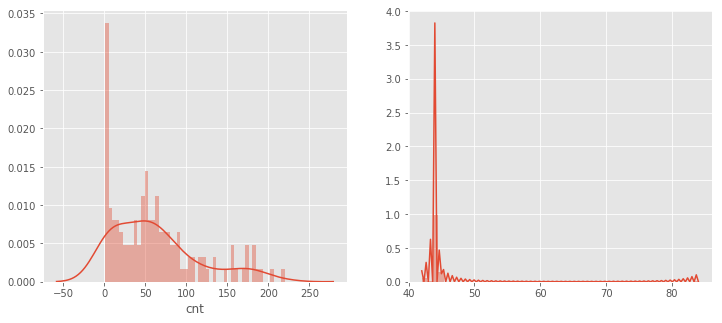

In [103]:
# here we plot our predictions' distribution vs. the actual distribution to estimate the goodness of the model.
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sn.distplot(y_test_sample, ax=ax1, bins=50)
sn.distplot((y_pred_combo), ax=ax2, bins=50)

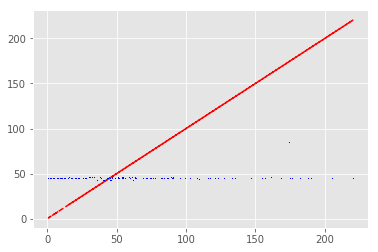

In [104]:
plt.plot(y_test_sample, y_test_sample, 'r--', y_test_sample, y_pred_combo, 'b,')
plt.show()

## Pipeline
Here we try to build a pipeline, where we figure out our best parameters for the logistic regression we run after it. 

In [105]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [106]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) # define the pipeline object.

In [107]:
parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

In [108]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
grid

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'SVM__C': [0.001, 0.1, 10, 100, 1000000.0], 'SVM__gamma': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
X_train_sample["holiday"] = X_train_sample.holiday.astype("int")
X_train_sample["workingday"] = X_train_sample.workingday.astype("int")
X_test_sample["holiday"] = X_test_sample.holiday.astype("int")
X_test_sample["workingday"] = X_test_sample.workingday.astype("int")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [110]:
grid.fit(X_train_sample, y_train_sample)
print (grid.score(X_test_sample,y_test_sample))
print (grid.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: Da

/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float6

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int

/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float6

/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float6

/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float6

0.07746478873239436
{'SVM__C': 10, 'SVM__gamma': 0.1}


/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [111]:
# Logistic Regression - Showing the Classification Report.
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(
    C=10,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    max_iter=200,
    multi_class="ovr",
    n_jobs=1,
    penalty="l2",
    random_state=None,
    solver="liblinear",
    tol=0.0001,
    verbose=0,
    warm_start=False,
)
logmodel.fit(X_train_sample, y_train_sample)

# Predicting on Test
y_pred_pip_sample = logmodel.predict(X_test_sample)

In [112]:
r2_pip = r2_score(y_test_sample, y_pred_pip_sample)
r2_pip.round(2)

0.64

In [113]:
accuracy_pip = cross_val_score(estimator = logmodel, X = X_train_sample, y = y_train_sample, cv =5)
accuracy_pip = accuracy_pip.mean()
accuracy_pip.round(2)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.05

Here we plot the distribution of the predictions and the actual distribution to see how similar they are. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


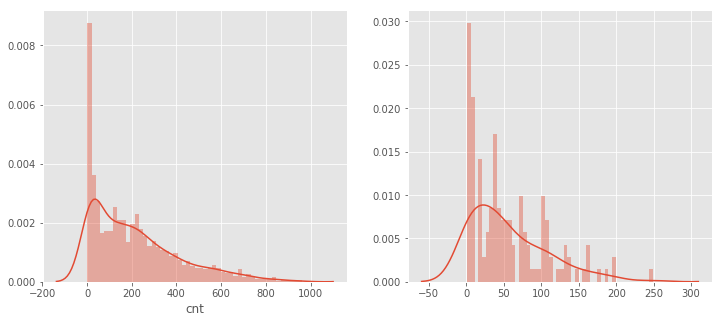

In [114]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sn.distplot(y_test, ax=ax1, bins=50)
sn.distplot((y_pred_pip_sample), ax=ax2, bins=50)

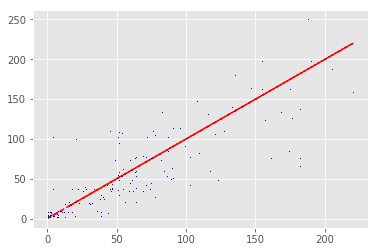

In [115]:
plt.plot(y_test_sample, y_test_sample, 'r--', y_test_sample, y_pred_pip_sample, 'b,')
plt.show()

## Wrap up
To sum up, here is once again the steps we went through: 
* **Step 1**: Exploratory data analysis: here we explore and get familiar with the data (graphically and numerically) 
    -  We plot the explanatory variables with the target variable to understand their relations graphically
* **Step 2**: Data cleaning: here we deal with outliers & NAs. 
   -  We change the class of certain variables to categorical to better fit our needs. Outliers did not need to be dropped as we get better results withouth this move. 
* **Step 3**: Feature engineering: we replace some of the columns with dummy columns in the right formats for our algorithms. 
* **Step 4**: Machine Learning: here we run different models individually, then we combine them and then we use a pipeline. 
    - Below a summary of the results of the various models

In [132]:
#here we summarize in a table the metrics of the various models we run to provide an overview
data = [
    {
        "regression": r2_rm,
        "random_forest": r2_rf,
        "xgb_standard": r2_xgb_standard,
        "xgb_tuned": r2_xgb,
        "combo*": r2_combo,
        "pipeline*": r2_pip,
    },
    {
        "regression": accuracy_rm[1],
        "random_forest": accuracy_rf,
        "xgb_standard": accuracy_xgb_model,
        "xgb_tuned": accuracy_xgb,
        "combo*": accuracy_combo,
        "pipeline*": accuracy_pip,
    },
]

models_comparison = pd.DataFrame(
    data,
    index=["r2", "accuracy"],
    columns=[
        "regression",
        "random_forest",
        "xgb_standard",
        "xgb_tuned",
        "combo*",
        "pipeline*",
    ],
)

In [133]:
models_comparison.round(2)

,regression,random_forest,xgb_standard,xgb_tuned,combo*,pipeline*
r2,0.63,0.85,0.79,0.88,-0.09,0.64
accuracy,0.68,0.72,0.77,0.77,0.05,0.05


In [134]:
# here we plot the predictions of the various models against the actual values, so to compare them again.

def comparison_show():
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    ax1 = axs[0]
    index = ["regression", "random_forest", "xgb_tuned"]
    r2 = models_comparison.loc[["r2"], ["regression", "random_forest", "xgb_tuned"]].values[
        0
    ]
    bar_width = 0.35
    opacity = 0.8
    ax1.bar(index, r2, bar_width, alpha=opacity, color="b", label="r2")

    ax1.set_title("Scores by model")
    ax1.legend()

    ax2 = axs[1]
    index = ["regression", "random_forest", "xgb_tuned"]
    accuracy = models_comparison.loc[
        ["accuracy"], ["regression", "random_forest", "xgb_tuned"]
    ].values[0]
    bar_width = 0.35
    opacity = 0.8
    ax2.bar(index, accuracy, bar_width, alpha=opacity, color="r", label="accuracy")

    ax2.set_title("Scores by model")
    ax2.legend()

    plt.show()

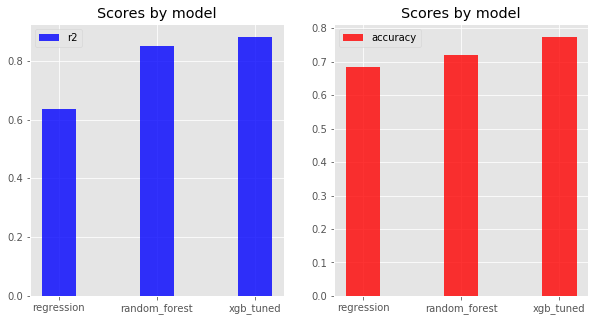

In [135]:
comparison_show()

As we can see, XGBoost tuned presents the best metrics by far. 

In [136]:
# here we plot the predictions of the various models against the actual values, so to compare them again.

def comparison_show_plots():

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(27, 22))

    ax1 = axs[0, 0]
    ax1.plot(y_test, y_test, "r--", y_test, y_pred_rm, "b,")
    ax1.set_title("Regression Model")

    ax2 = axs[0, 1]
    ax2.plot(y_test, y_test, "r--", y_test, y_pred_rf, "b,")
    ax2.set_title("Random Forest")

    ax1 = axs[1, 0]
    ax1.plot(y_test, y_test, "r--", y_test, y_pred_xgb_standard, "b,")
    ax1.set_title("XG Boost Standard")

    ax2 = axs[1, 1]
    ax2.plot(y_test, y_test, "r--", y_test, y_pred_xgb, "b,")
    ax2.set_title("XG Boost Tuned")


    plt.show()

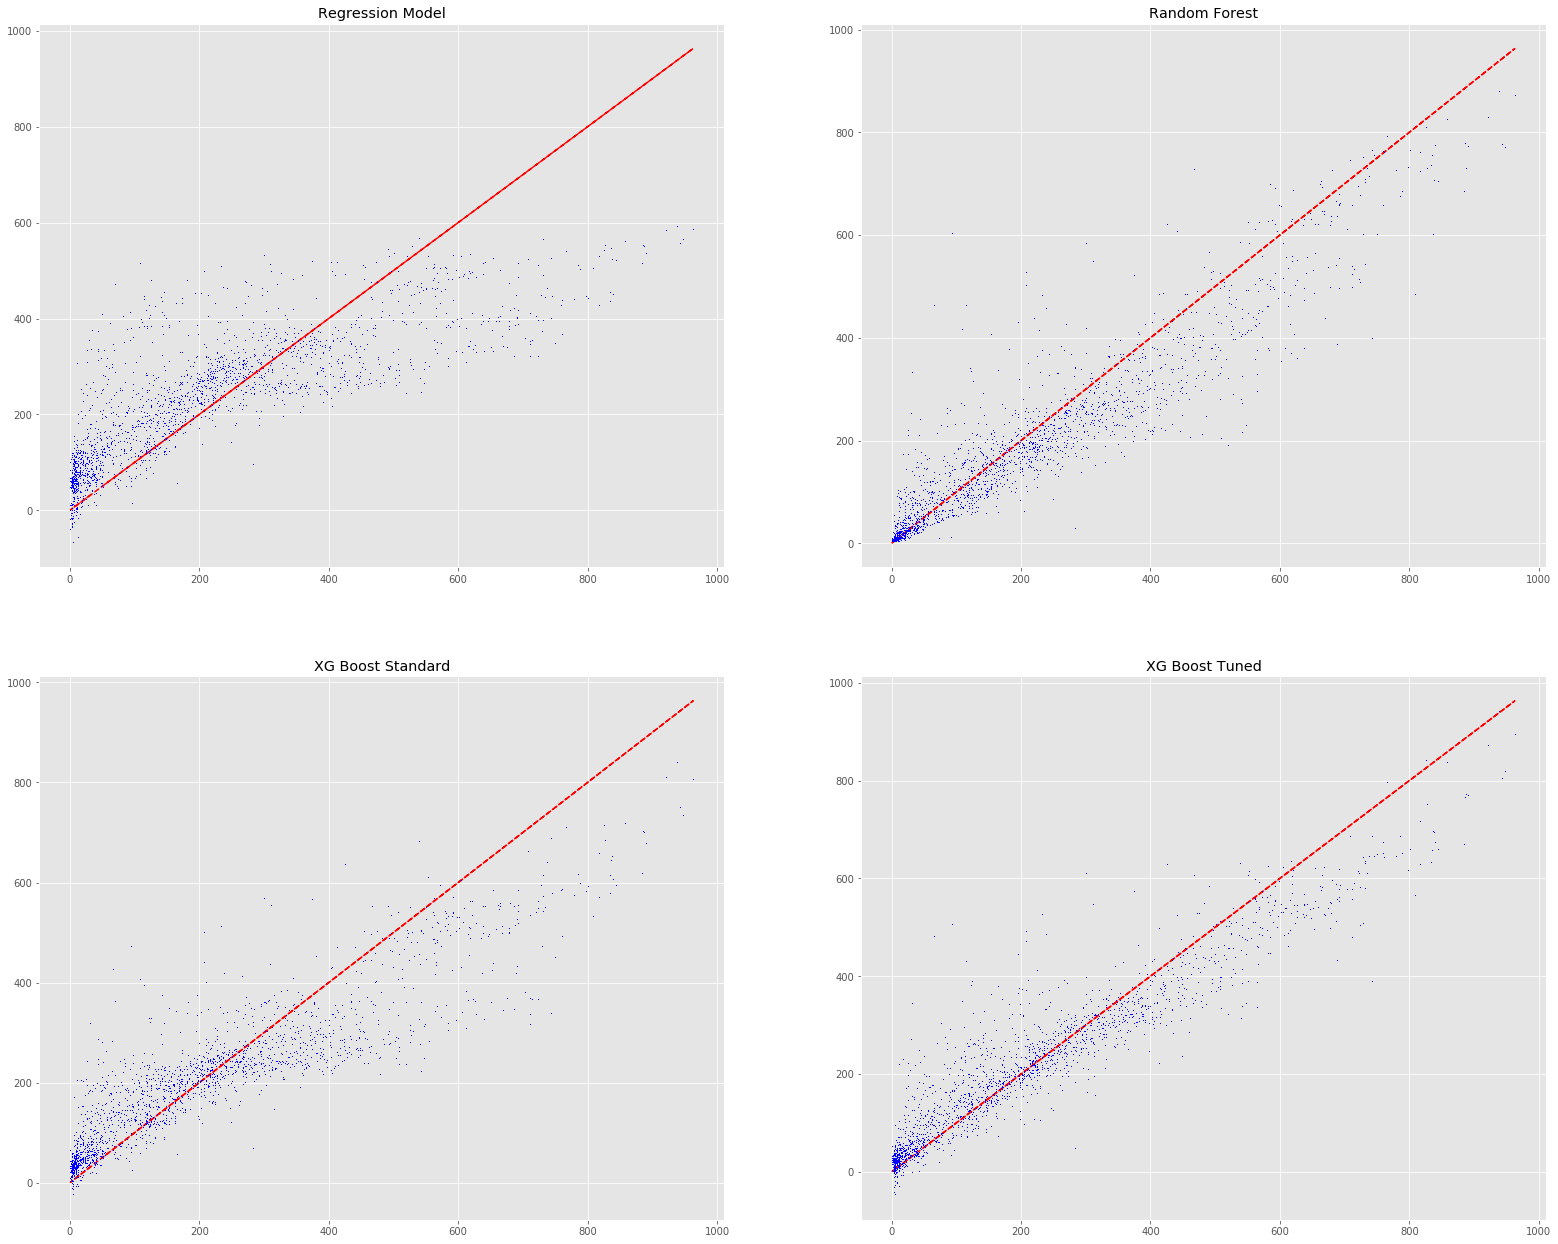

In [137]:
comparison_show_plots()

As we can clearly see, XGBoost after tuning reaches the best results. Compared to the other models, the performance is sensibly higher. The increase in the R^2 of the XGBoost, through hyperparameter tuning, was the turning point which allowed us to reach predictions which are this good. 